<a href="https://colab.research.google.com/github/moreirarodrigo-eo/Project_NSF/blob/main/Data_analysis_FIRE_data_for_lots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install geopandas -q
import geopandas as gpd
!pip install contextily -q
import contextily as ctx
!pip install pysal
import xyzservices.providers as xyz
import libpysal
import mapclassify
import matplotlib.pyplot as plt
import seaborn as sns

# **Geodataframes**

In [34]:
gdf_all = gpd.read_file('/content/drive/MyDrive/PROJETOS/Project_NCF_burn_exports/Data_to_share_CSV_SHP_Read-me/Burned_area_per_lot_ALL_lots.gpkg', layer = 'Burned_area_per_lot_ALL_lots').to_crs(epsg=4326)
gdf_surveyed_lots = gpd.read_file('/content/drive/MyDrive/PROJETOS/Project_NCF_burn_exports/Data_to_share_CSV_SHP_Read-me/Burned_area_per_lot_SURVEYED_lots.gpkg').to_crs(epsg=4326)
gdf_RO = gpd.read_file('/content/drive/MyDrive/PROJETOS/Project_US/EMATER_data/RO/11UFE250GC_SIR.shp').to_crs(epsg=4326)



In [ ]:
gdf_all.head(100)

In [ ]:
gdf_OPO = gpd.read_file('/content/drive/MyDrive/PROJETOS/Project_NCF_burn_exports/Total_lots_dissolved/Total_Lots_NewID_dissolve_OPO_fix.gpkg').to_crs(gdf_all.crs)
gdf_OPO.plot()

In [ ]:
gdf_all_OPO = gpd.clip(gdf_all, gdf_OPO)
gdf_all_OPO.plot()

# **Plot the spatial distribution**

In [ ]:
import plotly.express as px
from shapely.geometry import Polygon

gdf= gdf_surveyed_lots

# geometry = gdf.geometry.iloc[0]
# # Get the centroid of the geometry
# centroid = geometry.centroid
# # Get the centroid latitude and longitude
# centroid_lat = centroid.y
# centroid_lon = centroid.x

month = 'SEP_'
year = '2019'
gdf[month+year] = gdf[month+year].astype(float)
# Create the choropleth map
fig = px.choropleth_mapbox(
    gdf,
    geojson=gdf.geometry,
    locations=gdf.index,
    color=month + year,
    hover_name='LotID',
    hover_data=[month + year],
    zoom =2,
    height = 900
)

fig.update_layout(mapbox_style="open-street-map")

# fig.update_geos(center={'lon': centroid_lon, 'lat': centroid_lat})
fig.update_layout(mapbox_bounds={
    "west": -66.897454,
    "east": -58.383685,
    "south": -13.715951,
    "north": -8.670523,
})

# Add interactivity to the map
fig.update_layout(
    title='Burned area per lot',
    #margin=dict(l=0, r=0, t=25, b=25),
)

# Show the map
fig.show()

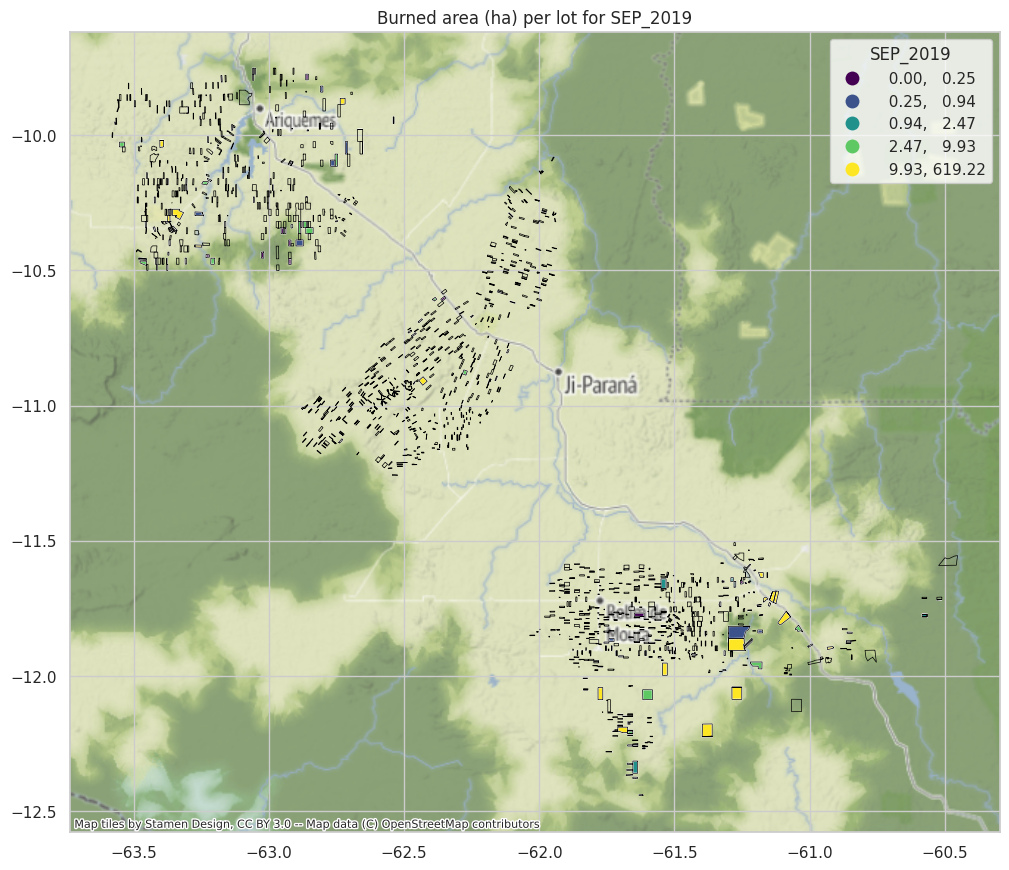

In [ ]:
month = 'SEP_'
year = '2019'
gdf[month+year] = gdf[month+year].astype(float)

n_bins = 5

ax = gdf.plot(column=month+year, scheme="Quantiles", k=n_bins, figsize=(12, 12), markersize=0.7, legend=True)
#gdf_RO.boundary.plot(ax=ax, color="black", linewidth=1)
gdf_surveyed_lots.boundary.plot(ax=ax, color="black", linewidth=0.5)
ctx.add_basemap(ax, crs=gdf.crs.to_string())
legend = ax.get_legend()
legend.set_title(month+year)
plt.title("Burned area (ha) per lot for "+ month+year)
plt.show()

# **Visualize the distribution of the data for the surveyed lots**

In [ ]:
gdf = gdf_surveyed_lots
gdf = gdf.drop(columns = ['Interview',
 'LotIDCorre',
 'LotID_fin',
 'responseid'])
gdf.columns.tolist()

In [ ]:
gdf.describe()

LotID    Shape_Leng    Shape_Area    AUG_2019   AUG_2020  \
count  1.931000e+03   1931.000000  1.931000e+03   53.000000   6.000000   
mean   4.696460e+05   4747.834992  1.210847e+06   23.791021   2.853803   
std    5.166262e+05   2749.001303  3.058677e+06   46.421850   4.652792   
min    7.000400e+04    345.020735  4.802918e+03    0.005304   0.038926   
25%    9.049250e+04   3267.037724  2.925118e+05    1.226393   0.164857   
50%    1.806440e+05   4761.552138  6.717936e+05    6.825810   0.494462   
75%    6.038100e+05   5240.413060  1.016810e+06   21.014191   3.328160   
max    1.518110e+06  44038.033000  7.360767e+07  228.512459  11.767255   

        AUG_2021   JUL_2019   JUL_2020   JUL_2021    SEP_2019    SEP_2020  \
count  37.000000  76.000000  26.000000  22.000000  251.000000  168.000000   
mean    4.279193   6.107985   1.488654   1.470507   10.949832   11.676583   
std     7.003329  17.502599   2.280106   2.551763   44.055546   38.862260   
min     0.014270   0.006539   0.039106   0.009772    0.004042    0.005134   
25%     0.175638   0.200267   0.237259   0.087890    0.409607    0.346367   
50%     0.378938   0.834426   0.383331   0.399653    1.580835    1.517780   
75%     5.518073   2.228610   1.727846   0.834423    6.140553    6.392698   
max    24.412502  89.842257   8.183705   8.271688  619.217574  337.501033   

        SEP_2021       Total  
count  16.000000  417.000000  
mean    7.352934   16.305422  
std    23.329364   69.987499  
min     0.039141    0.004042  
25%     0.310166    0.361239  
50%     0.692973    1.798583  
75%     2.475117    7.167586  
max    94.461570  985.951244

# **Plotting the distribution of the data for the surveyed lots**

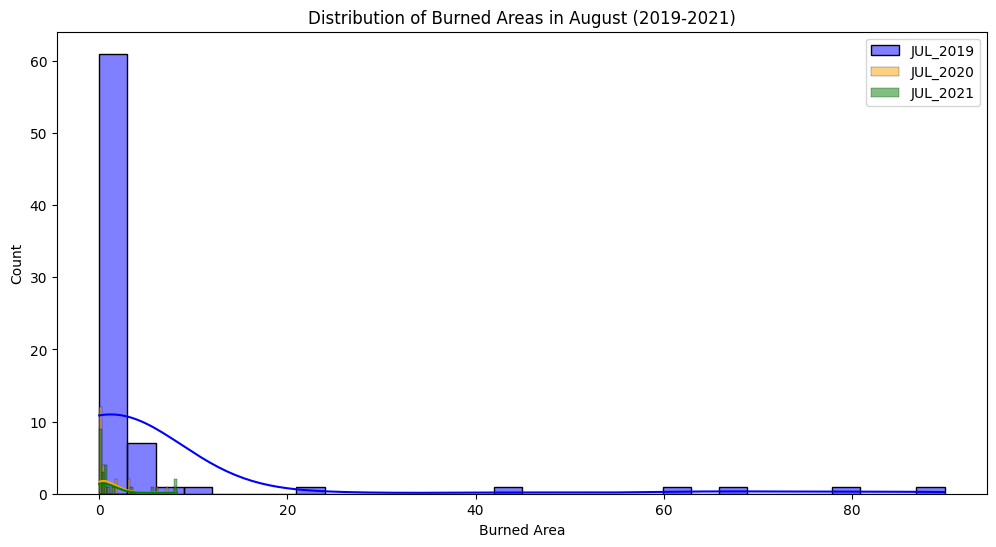

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=gdf, x='JUL_2019', bins=30, kde=True, color='blue', label='JUL_2019')
sns.histplot(data=gdf, x='JUL_2020', bins=30, kde=True, color='orange', label='JUL_2020')
sns.histplot(data=gdf, x='JUL_2021', bins=30, kde=True, color='green', label='JUL_2021')
plt.xlabel('Burned Area')
plt.title('Distribution of Burned Areas in July (2019-2021)')
plt.legend()
plt.show()

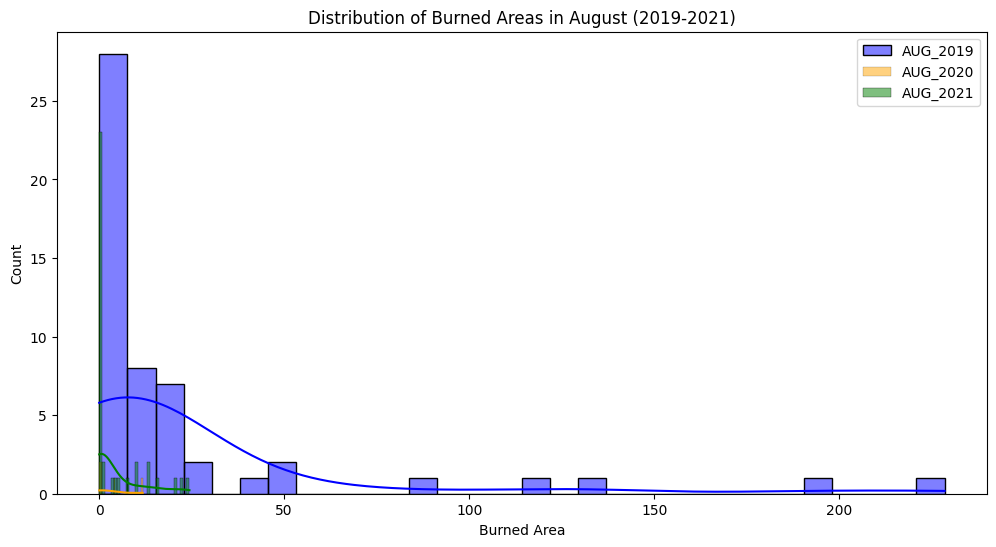

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(data=gdf, x='AUG_2019', bins=30, kde=True, color='blue', label='AUG_2019')
sns.histplot(data=gdf, x='AUG_2020', bins=30, kde=True, color='orange', label='AUG_2020')
sns.histplot(data=gdf, x='AUG_2021', bins=30, kde=True, color='green', label='AUG_2021')
plt.xlabel('Burned Area')
plt.title('Distribution of Burned Areas in August (2019-2021)')
plt.legend()
plt.show()

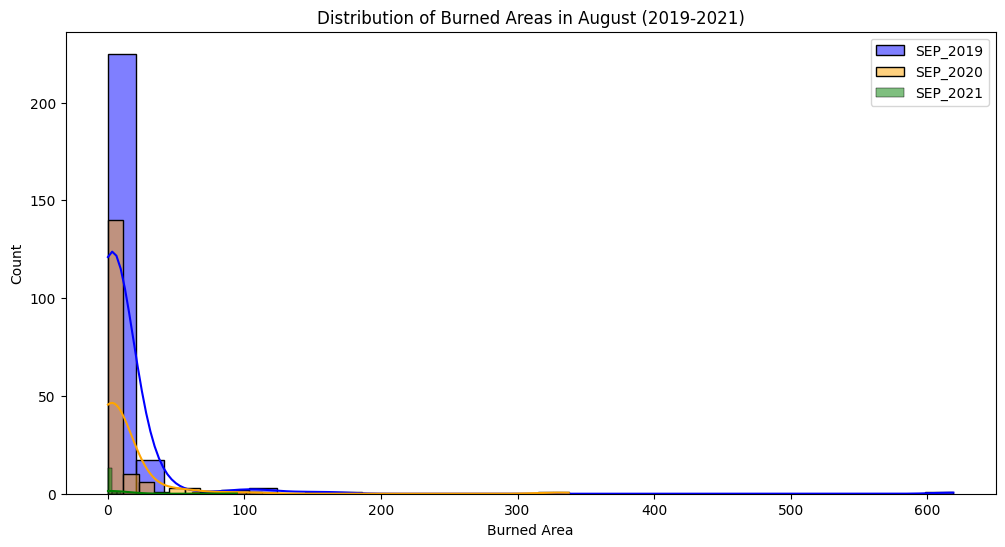

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=gdf, x='SEP_2019', bins=30, kde=True, color='blue', label='SEP_2019')
sns.histplot(data=gdf, x='SEP_2020', bins=30, kde=True, color='orange', label='SEP_2020')
sns.histplot(data=gdf, x='SEP_2021', bins=30, kde=True, color='green', label='SEP_2021')
plt.xlabel('Burned Area')
plt.title('Distribution of Burned Areas in September (2019-2021)')
plt.legend()
plt.show()

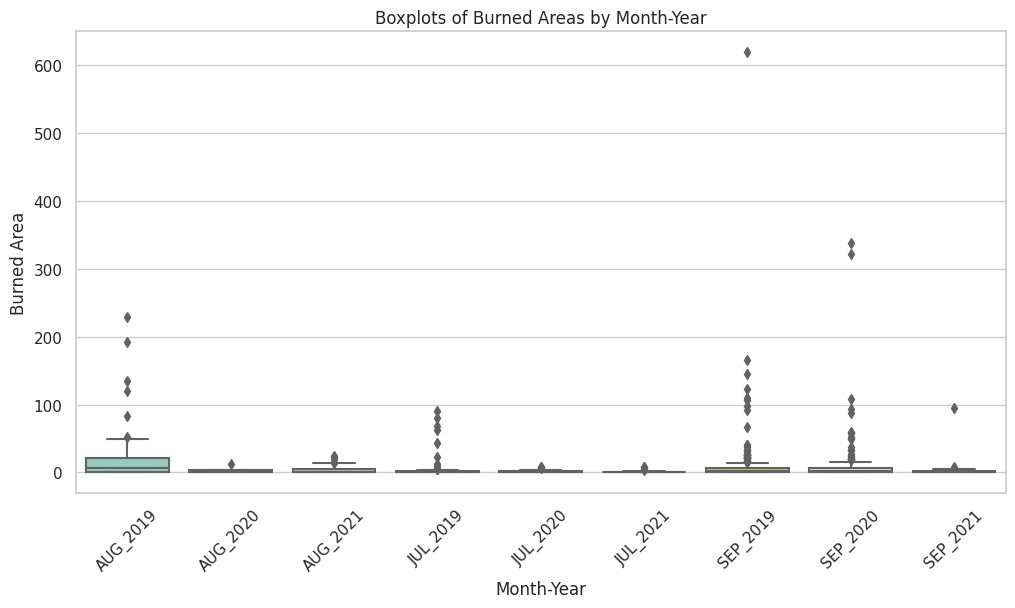

In [ ]:
id_vars = ['LotID', 'Shape_Leng', 'Shape_Area', 'Total', 'geometry']
melted_df = pd.melt(gdf, id_vars=id_vars, var_name='Month_Year', value_name='Burned_Area')
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(x='Month_Year', y='Burned_Area', data=melted_df, palette="Set3")
plt.xticks(rotation=45)
plt.title('Boxplots of Burned Areas by Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Burned Area')
plt.show()

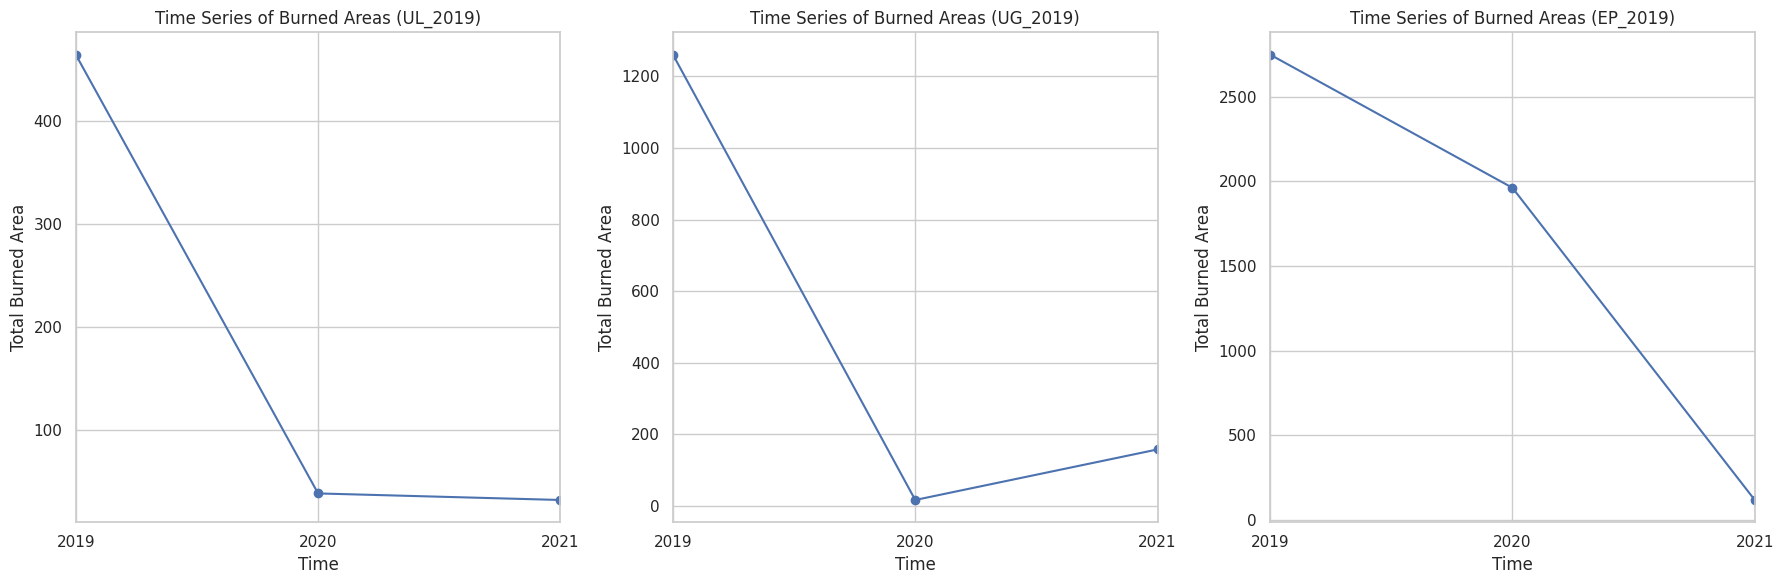

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

monthly_columns = [
    ['JUL_2019', 'JUL_2020', 'JUL_2021'],
    ['AUG_2019', 'AUG_2020', 'AUG_2021'],
    ['SEP_2019', 'SEP_2020', 'SEP_2021']
]

fig, axes = plt.subplots(nrows=1, ncols=len(monthly_columns), figsize=(18, 6))

for i, cols in enumerate(monthly_columns):
    time_series_data = gdf[cols].sum()
    time_series_data.index = pd.to_datetime(time_series_data.index, format='%b_%Y')
    ax = time_series_data.plot(ax=axes[i], marker='o')
    ax.set_title(f'Time Series of Burned Areas ({cols[0][-7:]})')
    ax.set_xlabel('Time')
    ax.set_ylabel('Total Burned Area')
    ax.grid(True)

plt.tight_layout()

plt.show()

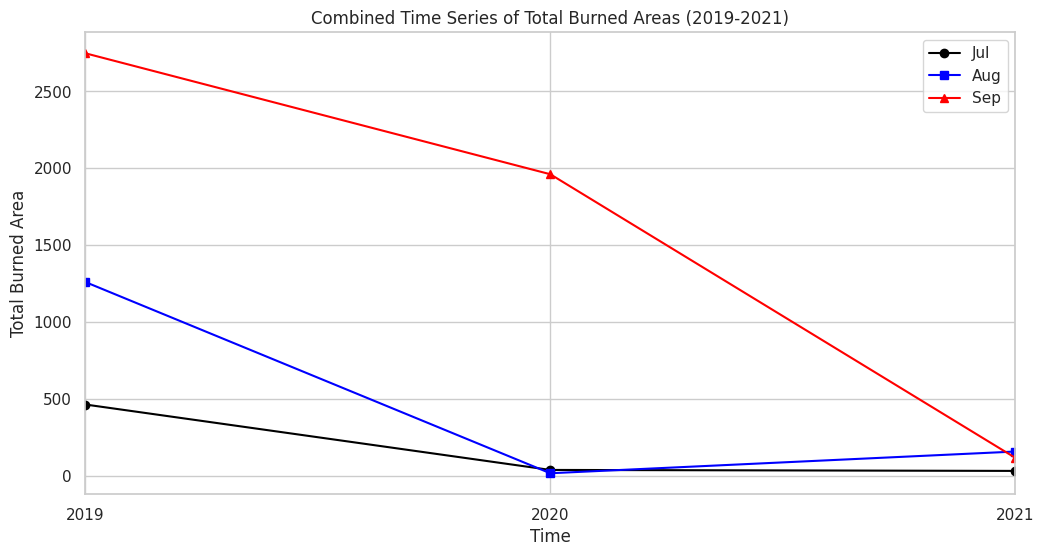

In [ ]:
# Define the monthly columns for each plot
monthly_columns = [
    ['JUL_2019', 'JUL_2020', 'JUL_2021'],
    ['AUG_2019', 'AUG_2020', 'AUG_2021'],
    ['SEP_2019', 'SEP_2020', 'SEP_2021']
]

combined_time_series = pd.Series()
for cols in monthly_columns:
    time_series_data = gdf[cols].sum()
    time_series_data.index = pd.to_datetime(time_series_data.index, format='%b_%Y')
    combined_time_series = combined_time_series.add(time_series_data, fill_value=0)

plt.figure(figsize=(12, 6))
markers = ['o', 's', '^']
colors = ['black', 'blue', 'red']
for i, cols in enumerate(monthly_columns):
    time_series_data = gdf[cols].sum()
    time_series_data.index = pd.to_datetime(time_series_data.index, format='%b_%Y')
    month = time_series_data.index[0].strftime('%b')  # Extract the month
    time_series_data.plot(marker=markers[i], label=month, linestyle='-', color=colors[i])

plt.title('Combined Time Series of Total Burned Areas (2019-2021)')
plt.xlabel('Time')
plt.ylabel('Total Burned Area')
plt.legend()
plt.grid(True)

plt.show()

#**VIsualizing the spatial distribution for the surveyed lots**

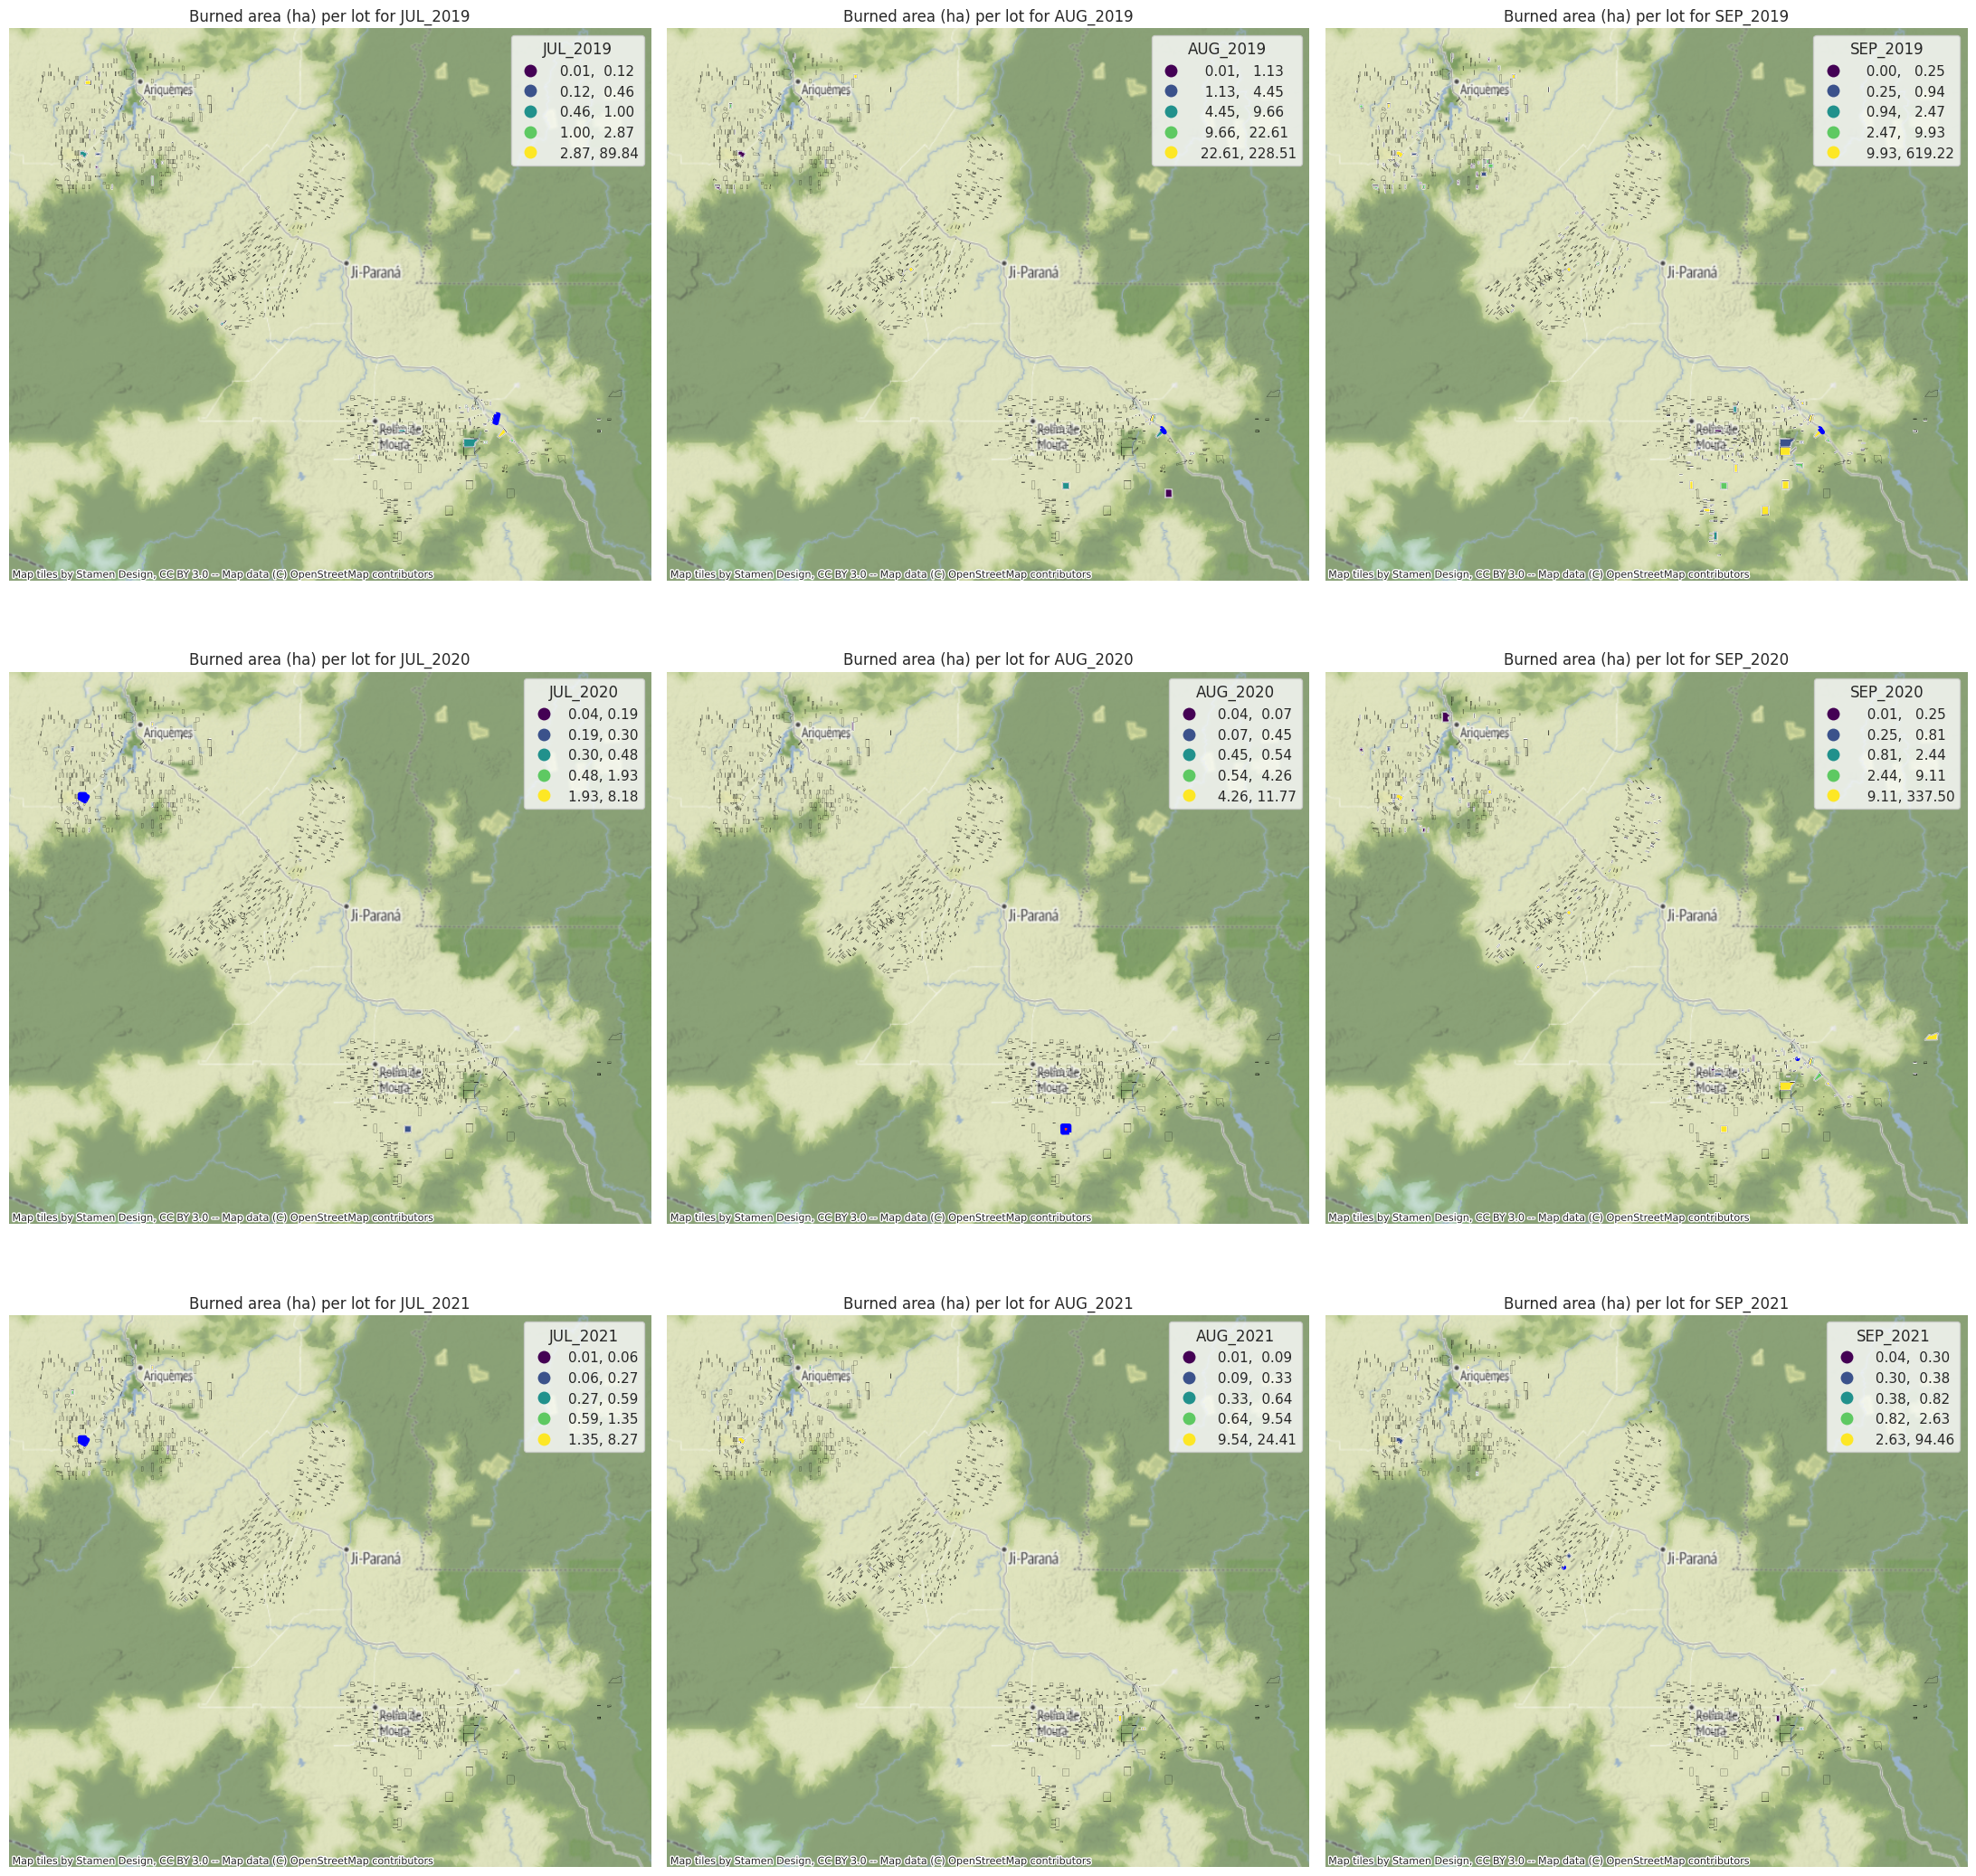

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

monthly_columns = ['JUL_2019', 'AUG_2019', 'SEP_2019', 'JUL_2020', 'AUG_2020', 'SEP_2020', 'JUL_2021', 'AUG_2021', 'SEP_2021']

n_bins = 5

fig, axs = plt.subplots(3, 3, figsize=(22, 22))
fig.subplots_adjust(wspace=0.1, hspace=0.1)

for i, month_year in enumerate(monthly_columns):
    # Find the lot with the maximum burned area for the current month_year
    max_lot_idx = gdf[month_year].idxmax()
    max_burned_lot = gdf.loc[max_lot_idx]

    # Plot the GeoDataFrame as before
    ax = axs[i // 3, i % 3]
    gdf.plot(column=month_year, scheme="Quantiles", k=n_bins, ax=ax, markersize=0.7, legend=True)
    gdf_surveyed_lots.boundary.plot(ax=ax, color="black", linewidth=0.15)

    # Create a GeoDataFrame containing only the maximum burned lot
    max_burned_gdf = gpd.GeoDataFrame([max_burned_lot], crs=gdf.crs)

    # Plot the maximum burned lot with a red color and its boundary with a blue color
    max_burned_gdf.plot(ax=ax, color="red", alpha=0.7, markersize=100)
    max_burned_gdf.boundary.plot(ax=ax, color='blue', linewidth=3.5)

    # Add a basemap using contextily
    ctx.add_basemap(ax, crs=gdf.crs.to_string())
    # ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
    # ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.USGS.USImagery)

    legend = ax.get_legend()
    legend.set_title(month_year)
    ax.set_title("Burned area (ha) per lot for " + month_year)
    ax.axis('off')

plt.tight_layout()
plt.show()


#**In case we want to see each month**

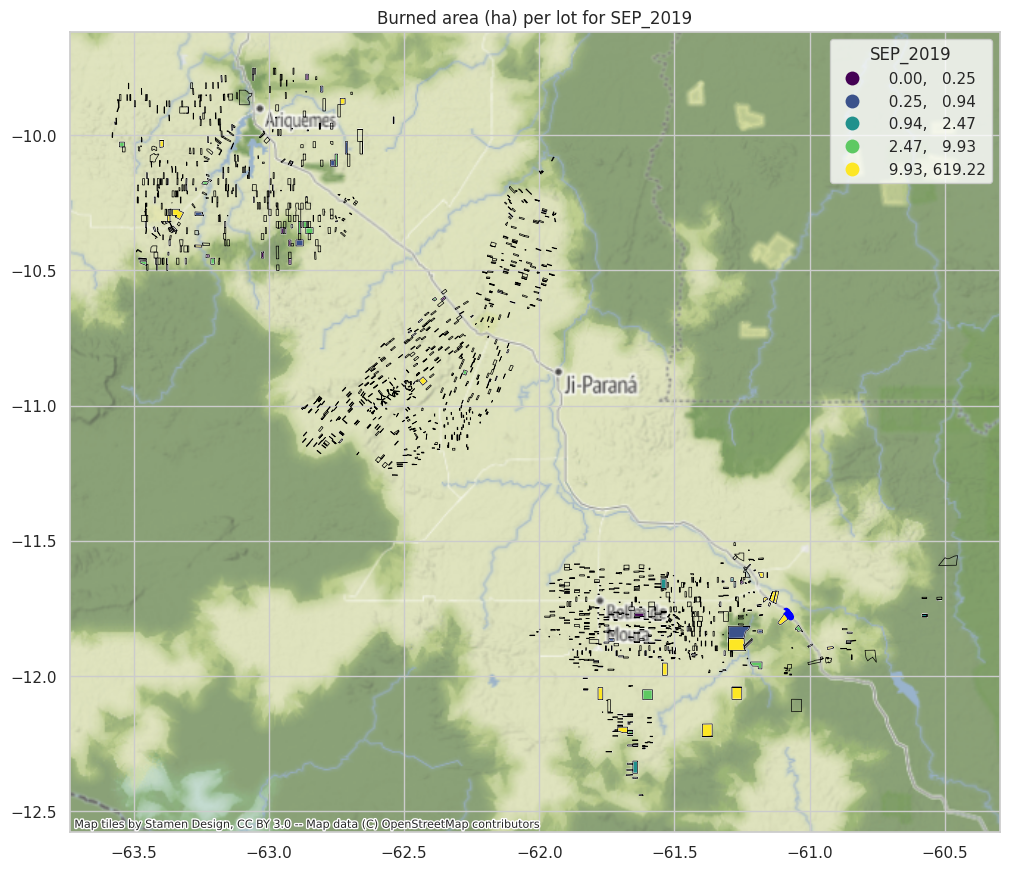

In [ ]:
n_bins = 5

# Find the lot with the maximum burned area for SEP_2019
max_lot_idx = gdf['SEP_2019'].idxmax()
max_burned_lot = gdf.loc[max_lot_idx]

# Plot the GeoDataFrame as before
ax = gdf.plot(column=month + year, scheme="Quantiles", k=n_bins, figsize=(12, 12), markersize=0.7, legend=True)
gdf_surveyed_lots.boundary.plot(ax=ax, color="black", linewidth=0.5)

# Create a GeoDataFrame containing only the maximum burned lot
max_burned_gdf = gpd.GeoDataFrame([max_burned_lot], crs=gdf.crs)

# Plot the maximum burned lot with a red color and its boundary with a blue color
max_burned_gdf.plot(ax=ax, color="red", alpha=0.7, markersize=100)
max_burned_gdf.boundary.plot(ax=ax, color='blue', linewidth=5)

# Add a basemap using contextily
ctx.add_basemap(ax, crs=gdf.crs.to_string())

legend = ax.get_legend()
legend.set_title(month + year)
plt.title("Burned area (ha) per lot for " + month + year)
plt.show()

#**In case we do not want a background**

<ipython-input-126-a2205586a152>:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-126-a2205586a152>:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-126-a2205586a152>:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-126-a2205586a152>:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-126-a2205586a152>:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-126-a2205586a152>:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future versi

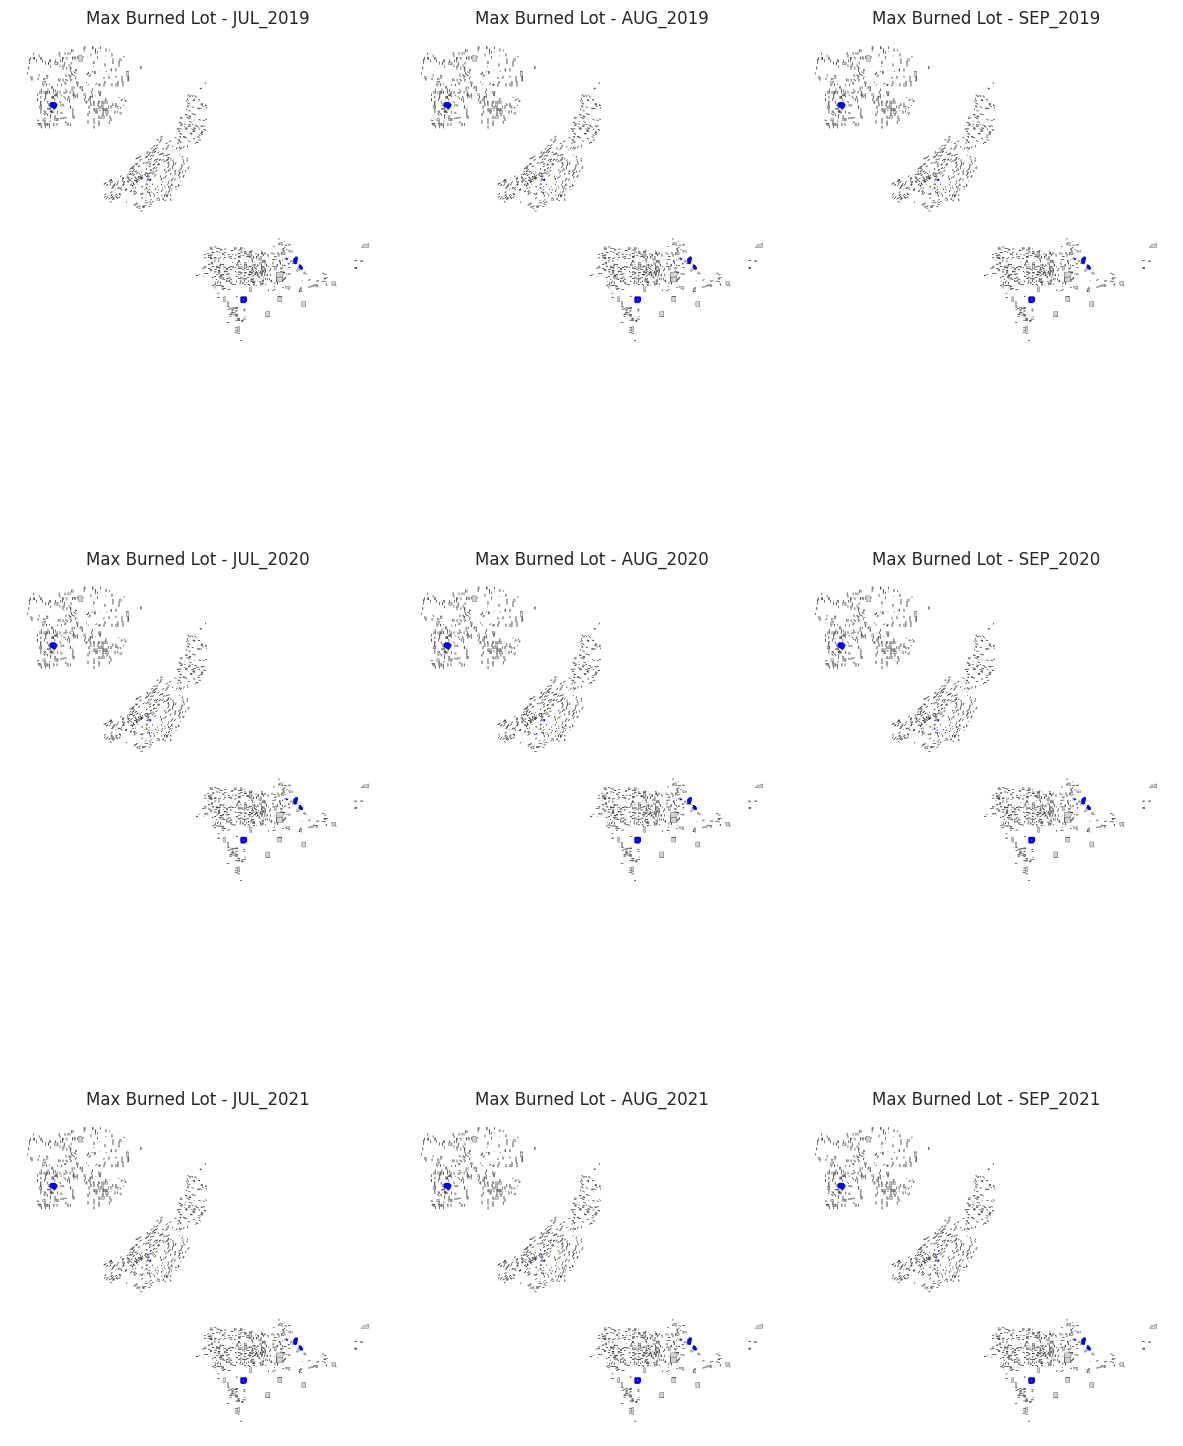

In [ ]:

# Define the monthly columns for each plot
monthly_columns = ['JUL_2019', 'AUG_2019', 'SEP_2019', 'JUL_2020', 'AUG_2020', 'SEP_2020', 'JUL_2021', 'AUG_2021', 'SEP_2021']

# Create an empty GeoDataFrame to store the lot with the maximum burned area for each month
max_burned_lots = gpd.GeoDataFrame(columns=gdf.columns)

# Loop through each month_year
for month_year in monthly_columns:
    # Find the lot with the maximum burned area for the current month_year
    max_lot_idx = gdf[month_year].idxmax()
    max_burned_lot = gdf.loc[max_lot_idx]

    # Append the maximum burned lot to the GeoDataFrame
    max_burned_lots = max_burned_lots.append(max_burned_lot)

# Plot the geometry of the lots with the maximum burned area and highlight their boundaries
fig, axs = plt.subplots(3, 3, figsize=(12, 18))
fig.subplots_adjust(wspace=0.1, hspace=0.1)
for i, month_year in enumerate(monthly_columns):
    plt.subplot(3, 3, i + 1)
    gdf.plot(ax=plt.gca(), color='lightgray', edgecolor='k', linewidth=0.2)
    max_burned_lots.plot(ax=plt.gca(), color='red', alpha=0.7, markersize=100)
    max_burned_lots.boundary.plot(ax=plt.gca(), color='blue', linewidth=2)
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

    plt.title(f'Max Burned Lot - {month_year}')
    plt.axis('off')

plt.tight_layout()
plt.show()

#**Create the dummy dataset**

In [79]:
gdf_all = gpd.read_file('/content/drive/MyDrive/PROJETOS/Project_NCF_burn_exports/Data_to_share_CSV_SHP_Read-me/Burned_area_per_lot_ALL_lots.gpkg', layer = 'Burned_area_per_lot_ALL_lots').to_crs(epsg=4326)
columns_to_suffix = [
    'AUG_2019', 'AUG_2020', 'AUG_2021',
    'JUL_2019', 'JUL_2020', 'JUL_2021',
    'SEP_2019', 'SEP_2020', 'SEP_2021',
    'Total'
]

column_mapping = {col: col + '_area' for col in columns_to_suffix}

# Rename the columns with the desired suffix
gdf_all = gdf_all.rename(columns=column_mapping)
gdf_all

LotID  Interview  LotIDCorre     LotID_fin         responseid  \
0        70039          1      700390  3.002880e+10  R_6VjZ6u5uqzVL5C4   
1        70040          2      700400  3.002880e+10  R_bn5JUGwAsorFA5j   
2        70048          1      700480  3.002880e+10  R_9t9CoDDomhP2Mnh   
3        70085          2      700850  3.002880e+10  R_mlhGs35Qi3QqSOj   
4        70089          1      700890  3.002880e+10  R_2F4HJfRHQ6wMRSs   
...        ...        ...         ...           ...                ...   
23231  1504771          0           0  1.014010e+10                NaN   
23232  1506571          0           0  1.014011e+10                NaN   
23233  1507301          0           0  1.014011e+10                NaN   
23234  1406781          0           0  1.006011e+10                NaN   
23235  1500291          0           0  1.014012e+10                NaN   

        Shape_Leng    Shape_Area  AUG_2019_area  AUG_2020_area  AUG_2021_area  \
0      4472.852462  4.910093e+05            NaN            NaN            NaN   
1      3968.138900  5.220206e+05            NaN            NaN            NaN   
2      4939.581286  9.655920e+05            NaN            NaN            NaN   
3      6047.022054  2.028331e+06            NaN            NaN            NaN   
4      4958.625546  9.815222e+05            NaN            NaN            NaN   
...            ...           ...            ...            ...            ...   
23231  4673.712748  5.586625e+05            NaN            NaN            NaN   
23232  3246.046772  4.114892e+05            NaN            NaN            NaN   
23233  5219.486665  2.924943e+05            NaN            NaN            NaN   
23234  5243.801922  4.723632e+05            NaN            NaN            NaN   
23235  5418.497052  5.800838e+05            NaN            NaN            NaN   

       JUL_2019_area  JUL_2020_area  JUL_2021_area  SEP_2019_area  \
0                NaN            NaN            NaN            NaN   
1                NaN            NaN            NaN            NaN   
2                NaN            NaN            NaN            NaN   
3                NaN            NaN            NaN            NaN   
4                NaN            NaN            NaN            NaN   
...              ...            ...            ...            ...   
23231            NaN            NaN            NaN        0.11738   
23232            NaN            NaN            NaN            NaN   
23233            NaN            NaN            NaN            NaN   
23234            NaN            NaN            NaN            NaN   
23235            NaN            NaN            NaN            NaN   

       SEP_2020_area  SEP_2021_area  Total_area  \
0                NaN            NaN         NaN   
1                NaN            NaN         NaN   
2                NaN            NaN         NaN   
3                NaN            NaN         NaN   
4                NaN            NaN         NaN   
...              ...            ...         ...   
23231            NaN            NaN     0.11738   
23232            NaN            NaN         NaN   
23233            NaN            NaN         NaN   
23234            NaN            NaN         NaN   
23235            NaN            NaN         NaN   

                                                geometry  
0      POLYGON ((-61.88806 -11.67854, -61.88807 -11.6...  
1      POLYGON ((-61.90397 -11.68877, -61.90338 -11.6...  
2      POLYGON ((-61.92448 -11.78252, -61.90647 -11.7...  
3      POLYGON ((-61.88792 -11.60400, -61.88792 -11.6...  
4      POLYGON ((-61.92432 -11.66031, -61.90632 -11.6...  
...                                                  ...  
23231  POLYGON ((-63.22082 -10.15296, -63.22186 -10.1...  
23232  POLYGON ((-63.34550 -10.36462, -63.34549 -10.3...  
23233  POLYGON ((-63.32743 -10.25096, -63.32861 -10.2...  
23234  POLYGON ((-63.20847 -10.24963, -63.20864 -10.2...  
23235  POLYGON ((-63.40722 -10.22855, -63.40784 -10.2...

In [80]:
import pandas as pd
gdf_all_dummy = gdf_all
columns_to_dummy = [
    'AUG_2019_area', 'AUG_2020_area', 'AUG_2021_area',
    'JUL_2019_area', 'JUL_2020_area', 'JUL_2021_area',
    'SEP_2019_area', 'SEP_2020_area', 'SEP_2021_area',
    'Total_area'
]

gdf_all_dummy[columns_to_dummy] = gdf_all_dummy[columns_to_dummy].applymap(lambda x: 1 if x > 0 else 0)

In [81]:
gdf_all_dummy

LotID  Interview  LotIDCorre     LotID_fin         responseid  \
0        70039          1      700390  3.002880e+10  R_6VjZ6u5uqzVL5C4   
1        70040          2      700400  3.002880e+10  R_bn5JUGwAsorFA5j   
2        70048          1      700480  3.002880e+10  R_9t9CoDDomhP2Mnh   
3        70085          2      700850  3.002880e+10  R_mlhGs35Qi3QqSOj   
4        70089          1      700890  3.002880e+10  R_2F4HJfRHQ6wMRSs   
...        ...        ...         ...           ...                ...   
23231  1504771          0           0  1.014010e+10                NaN   
23232  1506571          0           0  1.014011e+10                NaN   
23233  1507301          0           0  1.014011e+10                NaN   
23234  1406781          0           0  1.006011e+10                NaN   
23235  1500291          0           0  1.014012e+10                NaN   

        Shape_Leng    Shape_Area  AUG_2019_area  AUG_2020_area  AUG_2021_area  \
0      4472.852462  4.910093e+05              0              0              0   
1      3968.138900  5.220206e+05              0              0              0   
2      4939.581286  9.655920e+05              0              0              0   
3      6047.022054  2.028331e+06              0              0              0   
4      4958.625546  9.815222e+05              0              0              0   
...            ...           ...            ...            ...            ...   
23231  4673.712748  5.586625e+05              0              0              0   
23232  3246.046772  4.114892e+05              0              0              0   
23233  5219.486665  2.924943e+05              0              0              0   
23234  5243.801922  4.723632e+05              0              0              0   
23235  5418.497052  5.800838e+05              0              0              0   

       JUL_2019_area  JUL_2020_area  JUL_2021_area  SEP_2019_area  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
23231              0              0              0              1   
23232              0              0              0              0   
23233              0              0              0              0   
23234              0              0              0              0   
23235              0              0              0              0   

       SEP_2020_area  SEP_2021_area  Total_area  \
0                  0              0           0   
1                  0              0           0   
2                  0              0           0   
3                  0              0           0   
4                  0              0           0   
...              ...            ...         ...   
23231              0              0           1   
23232              0              0           0   
23233              0              0           0   
23234              0              0           0   
23235              0              0           0   

                                                geometry  
0      POLYGON ((-61.88806 -11.67854, -61.88807 -11.6...  
1      POLYGON ((-61.90397 -11.68877, -61.90338 -11.6...  
2      POLYGON ((-61.92448 -11.78252, -61.90647 -11.7...  
3      POLYGON ((-61.88792 -11.60400, -61.88792 -11.6...  
4      POLYGON ((-61.92432 -11.66031, -61.90632 -11.6...  
...                                                  ...  
23231  POLYGON ((-63.22082 -10.15296, -63.22186 -10.1...  
23232  POLYGON ((-63.34550 -10.36462, -63.34549 -10.3...  
23233  POLYGON ((-63.32743 -10.25096, -63.32861 -10.2...  
23234  POLYGON ((-63.20847 -10.24963, -63.20864 -10.2...  
23235  POLYGON ((-63.40722 -10.22855, -63.40784 -10.2...

In [82]:
# Columns with the "area" suffix
columns_with_area_suffix = [
    'AUG_2019_area', 'AUG_2020_area', 'AUG_2021_area',
    'JUL_2019_area', 'JUL_2020_area', 'JUL_2021_area',
    'SEP_2019_area', 'SEP_2020_area', 'SEP_2021_area',
    'Total_area'
]

# Suffix to replace
old_suffix = '_area'
new_suffix = '_dummy'

# Create a mapping dictionary to replace the old suffix with the new one
column_mapping = {col: col.replace(old_suffix, new_suffix) for col in columns_with_area_suffix}

# Rename the columns with the updated suffix
gdf_all_dummy = gdf_all_dummy.rename(columns=column_mapping)
gdf_all_dummy = gdf_all_dummy.drop(columns = ['Interview',
 'LotIDCorre',
 'LotID_fin',
 'responseid',
 'Shape_Leng',
 'Shape_Area','geometry'])
gdf_all_dummy

merged = pd.merge(gdf_all_dummy, gdf_all, on = 'LotID')
merged.columns.tolist()

['LotID',
 'AUG_2019_dummy',
 'AUG_2020_dummy',
 'AUG_2021_dummy',
 'JUL_2019_dummy',
 'JUL_2020_dummy',
 'JUL_2021_dummy',
 'SEP_2019_dummy',
 'SEP_2020_dummy',
 'SEP_2021_dummy',
 'Total_dummy',
 'Interview',
 'LotIDCorre',
 'LotID_fin',
 'responseid',
 'Shape_Leng',
 'Shape_Area',
 'AUG_2019_area',
 'AUG_2020_area',
 'AUG_2021_area',
 'JUL_2019_area',
 'JUL_2020_area',
 'JUL_2021_area',
 'SEP_2019_area',
 'SEP_2020_area',
 'SEP_2021_area',
 'Total_area',
 'geometry']

In [90]:
merged = gpd.GeoDataFrame(merged)

In [77]:
merged.to_csv('/content/drive/MyDrive/PROJETOS/Project_NCF_burn_exports/Data_to_share_CSV_SHP_Read-me/Burned_area_in_ha_Dummy_per_lot_ALL_LOTS.csv')
merged.to_file('/content/drive/MyDrive/PROJETOS/Project_NCF_burn_exports/Data_to_share_CSV_SHP_Read-me/Burned_area_in_ha_Dummy_per_lot_ALL_LOTS.gpkg')

In [ ]:
df_dummy = pd.read_csv('/content/drive/MyDrive/PROJETOS/Project_NCF_burn_exports/Data_to_share_CSV_SHP_Read-me/Burned_area_in_ha_Dummy_per_lot_ALL_LOTS.csv')
df_dummy